**Problem Statement:** I plan to showcase the relationship between and create a model that will predict psychological disorders (depression, anxiety, substance abuse, etc.) using early childhood trauma ( & demographic information) as a predictor.

**Approach:** Have data for 2009 - 2012. Will use data from 2009 to 2011 to train my model and then test it on data from 2012. Will create different models for different disorders. Will look at General Health Status, Physical Health Status, Mental Health Status, Smokiing Behaviors, Activity Limitation Due to Health Problems, binge drinking...

**Objectives:** Build a predictive model; start and explore a narrative about how ACE affects an individual into adulthood (correlation to psychological disorders; trends over time and forecasting) and start thinking about solutions to mitigate those adverse affects (create a website?)

**Goals/ Success Metrics:** Will look at sensitivity (since we're talking about health and mental illness I want to increase the chance that someone will be diagnosed if they do have something that should be addressed)

**Risks/Assumptions:** All ACE questions are correlated to each other and different questions asked in different years. ACE questions were included as an optional module in the BRFSS from 2009 through 2012 and then as state-added questions thereafter(so if I want data past 2012 then I have to contact individual state health departments to establish data use agreements that would allow me to use the data). Does look like for 2019 ACE is back on the BRFSS (but data may not be released until November)

**Proposed Models:** Logistic Regression (want my model to be interpretable), decision trees, regularization (lasso, elasticnet)...then possible a neural net when features have been decreased to see about increasing specificity; time series

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# just checking to see how my pickle file reads into the notebook
brfss_2009 = pd.read_pickle('./Pickled_Data/brfss_2009.pkl')
brfss_2010 = pd.read_pickle('./Pickled_Data/brfss_2010.pkl')
brfss_2011 = pd.read_pickle('./Pickled_Data/brfss_2011.pkl')
brfss_2012 = pd.read_pickle('./Pickled_Data/brfss_2012.pkl')

In [4]:
brfss_0910 = pd.concat([brfss_2009, brfss_2010], ignore_index=True)

In [6]:
brfss_1112 = pd.concat([brfss_2011, brfss_2012], ignore_index=True)

In [7]:
brfss_0910.shape

(883682, 49)

In [8]:
brfss_1112.shape

(982154, 49)

In [9]:
brfss_0910.isna().sum()

_STATE           0
DISPCODE         0
GENHLTH         13
PHYSHLTH         7
MENTHLTH         5
POORHLTH    423420
SMOKE100         1
SMOKDAY2    476700
STOPSMK2    743187
USENOW3       5844
AGE              1
HISPANC2         1
MRACE            0
ORACE2      866663
MARITAL        352
CHILDREN       418
EDUCA          499
EMPLOY         631
INCOME2        869
RENTHOM1    817065
SEX              0
EXERANY2         3
QLACTLM2      5405
AVEDRNK2    474354
DRNK3GE5    474873
QLREST2          8
SLEPTIME    799091
SCNTMONY    820455
SCNTMEAL    817091
ACEDEPRS    847158
ACEDRINK    847184
ACEDRUGS    847189
ACEPRISN    847192
ACEDIVRC    847199
ACEPUNCH    847206
ACEHURT     847218
ACESWEAR    847230
ACETOUCH    847240
ACETTHEM    847249
ACEHVSEX    847260
MSCODE       16090
_IMPAGE          0
_RFHLTH          0
_SMOKER3         0
_RFSMOK3         0
_PRACE         325
_EDUCAG          0
_INCOMG          0
_TOTINDA         0
dtype: int64

In [10]:
brfss_1112.isna().sum()

_STATE           0
DISPCODE         0
GENHLTH          7
PHYSHLTH         2
MENTHLTH         0
POORHLTH    468837
SMOKE100      6843
SMOKDAY2    537479
STOPSMK2    821342
USENOW3       7311
AGE              1
HISPANC2         0
MRACE            0
ORACE2      961839
MARITAL        516
CHILDREN       965
EDUCA          794
EMPLOY         994
INCOME2       1749
RENTHOM1      4522
SEX              0
EXERANY2     20734
QLACTLM2     30128
AVEDRNK2    509175
DRNK3GE5    509699
QLREST2     933484
SLEPTIME    933506
SCNTMONY    891220
SCNTMEAL    885812
ACEDEPRS    900805
ACEDRINK    900855
ACEDRUGS    900868
ACEPRISN    900874
ACEDIVRC    900879
ACEPUNCH    900896
ACEHURT     900911
ACESWEAR    900936
ACETOUCH    900949
ACETTHEM    900980
ACEHVSEX    901016
MSCODE      181132
_IMPAGE          0
_RFHLTH          0
_SMOKER3         0
_RFSMOK3         0
_PRACE         426
_EDUCAG          0
_INCOMG          0
_TOTINDA         0
dtype: int64

In [11]:
# since I'm interested specifically in ACE then any row with null values for those questions will be dropped
brfss_0910.dropna(subset=['ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC', 'ACEPUNCH', 'ACEHURT', 'ACESWEAR', 
                       'ACETOUCH', 'ACETTHEM', 'ACEHVSEX'], inplace=True)

In [12]:
brfss_1112.dropna(subset=['ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC', 'ACEPUNCH', 'ACEHURT', 'ACESWEAR', 
                       'ACETOUCH', 'ACETTHEM', 'ACEHVSEX'], inplace=True)

In [13]:
brfss_0910.shape

(36418, 49)

In [14]:
brfss_1112.shape

(81137, 49)

In [16]:
brfss_0910.isna().sum()

_STATE          0
DISPCODE        0
GENHLTH         0
PHYSHLTH        0
MENTHLTH        0
POORHLTH    17825
SMOKE100        0
SMOKDAY2    18984
STOPSMK2    30587
USENOW3         0
AGE             0
HISPANC2        0
MRACE           0
ORACE2      34192
MARITAL         0
CHILDREN        0
EDUCA           0
EMPLOY          0
INCOME2         0
RENTHOM1    28001
SEX             0
EXERANY2        0
QLACTLM2        0
AVEDRNK2    17954
DRNK3GE5    17954
QLREST2         0
SLEPTIME    14492
SCNTMONY    28401
SCNTMEAL    28001
ACEDEPRS        0
ACEDRINK        0
ACEDRUGS        0
ACEPRISN        0
ACEDIVRC        0
ACEPUNCH        0
ACEHURT         0
ACESWEAR        0
ACETOUCH        0
ACETTHEM        0
ACEHVSEX        0
MSCODE          0
_IMPAGE         0
_RFHLTH         0
_SMOKER3        0
_RFSMOK3        0
_PRACE          0
_EDUCAG         0
_INCOMG         0
_TOTINDA        0
dtype: int64

In [17]:
brfss_1112.isna().sum()

_STATE          0
DISPCODE        0
GENHLTH         0
PHYSHLTH        0
MENTHLTH        0
POORHLTH    39439
SMOKE100        0
SMOKDAY2    43026
STOPSMK2    67709
USENOW3         0
AGE             0
HISPANC2        0
MRACE           0
ORACE2      79751
MARITAL         0
CHILDREN       21
EDUCA           0
EMPLOY          0
INCOME2        63
RENTHOM1        0
SEX             0
EXERANY2        0
QLACTLM2        0
AVEDRNK2    37718
DRNK3GE5    37718
QLREST2     67208
SLEPTIME    67208
SCNTMONY    64517
SCNTMEAL    63208
ACEDEPRS        0
ACEDRINK        0
ACEDRUGS        0
ACEPRISN        0
ACEDIVRC        0
ACEPUNCH        0
ACEHURT         0
ACESWEAR        0
ACETOUCH        0
ACETTHEM        0
ACEHVSEX        0
MSCODE      14378
_IMPAGE         0
_RFHLTH         0
_SMOKER3        0
_RFSMOK3        0
_PRACE          0
_EDUCAG         0
_INCOMG         0
_TOTINDA        0
dtype: int64

In [75]:
# 1: Male; 2: Female
brfss_1112['SEX'].value_counts(normalize=True)

2.0    0.595191
1.0    0.404809
Name: SEX, dtype: float64

In [76]:
# 1: Male; 2:Female
brfss_0910['SEX'].value_counts(normalize=True)

2.0    0.617936
1.0    0.382064
Name: SEX, dtype: float64

In [19]:
combined_brfss = pd.concat([brfss_0910, brfss_1112], ignore_index=True)

In [20]:
combined_brfss.shape

(117555, 49)

In [21]:
combined_brfss.isna().sum()

_STATE           0
DISPCODE         0
GENHLTH          0
PHYSHLTH         0
MENTHLTH         0
POORHLTH     57264
SMOKE100         0
SMOKDAY2     62010
STOPSMK2     98296
USENOW3          0
AGE              0
HISPANC2         0
MRACE            0
ORACE2      113943
MARITAL          0
CHILDREN        21
EDUCA            0
EMPLOY           0
INCOME2         63
RENTHOM1     28001
SEX              0
EXERANY2         0
QLACTLM2         0
AVEDRNK2     55672
DRNK3GE5     55672
QLREST2      67208
SLEPTIME     81700
SCNTMONY     92918
SCNTMEAL     91209
ACEDEPRS         0
ACEDRINK         0
ACEDRUGS         0
ACEPRISN         0
ACEDIVRC         0
ACEPUNCH         0
ACEHURT          0
ACESWEAR         0
ACETOUCH         0
ACETTHEM         0
ACEHVSEX         0
MSCODE       14378
_IMPAGE          0
_RFHLTH          0
_SMOKER3         0
_RFSMOK3         0
_PRACE           0
_EDUCAG          0
_INCOMG          0
_TOTINDA         0
dtype: int64

In [24]:
combined_brfss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117555 entries, 0 to 117554
Data columns (total 49 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _STATE    117555 non-null  float64
 1   DISPCODE  117555 non-null  float64
 2   GENHLTH   117555 non-null  float64
 3   PHYSHLTH  117555 non-null  float64
 4   MENTHLTH  117555 non-null  float64
 5   POORHLTH  60291 non-null   float64
 6   SMOKE100  117555 non-null  float64
 7   SMOKDAY2  55545 non-null   float64
 8   STOPSMK2  19259 non-null   float64
 9   USENOW3   117555 non-null  float64
 10  AGE       117555 non-null  float64
 11  HISPANC2  117555 non-null  float64
 12  MRACE     117555 non-null  object 
 13  ORACE2    3612 non-null    float64
 14  MARITAL   117555 non-null  float64
 15  CHILDREN  117534 non-null  float64
 16  EDUCA     117555 non-null  float64
 17  EMPLOY    117555 non-null  float64
 18  INCOME2   117492 non-null  float64
 19  RENTHOM1  89554 non-null   float64
 20  SEX 

In [48]:
combined_brfss.head().T

,0,1,2,3,4
_STATE,5,5,5,5,5
DISPCODE,110,110,110,110,110
GENHLTH,2,4,2,5,4
PHYSHLTH,88,15,6,30,13
MENTHLTH,88,77,88,88,88
POORHLTH,NaN,88,6,88,88
SMOKE100,2,1,2,2,1
SMOKDAY2,NaN,3,NaN,NaN,3
STOPSMK2,NaN,NaN,NaN,NaN,NaN
USENOW3,3,3,3,3,3


Going to do some EDA for questions with no null values

In [53]:
combined_no_null = combined_brfss.dropna(axis=1)
combined_no_null = combined_no_null.drop(columns='MRACE')

In [54]:
combined_no_null.shape

(117555, 34)

In [55]:
combined_no_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117555 entries, 0 to 117554
Data columns (total 34 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _STATE    117555 non-null  float64
 1   DISPCODE  117555 non-null  float64
 2   GENHLTH   117555 non-null  float64
 3   PHYSHLTH  117555 non-null  float64
 4   MENTHLTH  117555 non-null  float64
 5   SMOKE100  117555 non-null  float64
 6   USENOW3   117555 non-null  float64
 7   AGE       117555 non-null  float64
 8   HISPANC2  117555 non-null  float64
 9   MARITAL   117555 non-null  float64
 10  EDUCA     117555 non-null  float64
 11  EMPLOY    117555 non-null  float64
 12  SEX       117555 non-null  float64
 13  EXERANY2  117555 non-null  float64
 14  QLACTLM2  117555 non-null  float64
 15  ACEDEPRS  117555 non-null  float64
 16  ACEDRINK  117555 non-null  float64
 17  ACEDRUGS  117555 non-null  float64
 18  ACEPRISN  117555 non-null  float64
 19  ACEDIVRC  117555 non-null  float64
 20  ACEP

In [68]:
#results_df2.groupby(by = 'class')['sample_size'].mean()
combined_no_null.groupby(['ACEDEPRS', 'SEX']).size()

ACEDEPRS  SEX
1.0       1.0     5718
          2.0    12273
2.0       1.0    40005
          2.0    56910
7.0       1.0      329
          2.0      393
9.0       1.0      707
          2.0     1220
dtype: int64

In [93]:
combined_no_null['ACEDEPRS'].value_counts()

2.0    96915
1.0    17991
9.0     1927
7.0      722
Name: ACEDEPRS, dtype: int64

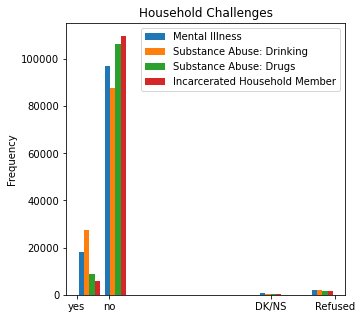

In [183]:
# 1=Yes; 2=No; 7=DK/NS; 9=Refused
plt.figure(figsize=(5, 5))
plt.title('Household Challenges')
plt.hist(x=[combined_no_null['ACEDEPRS'], combined_no_null['ACEDRINK'],
            combined_no_null['ACEDRUGS'], 
            combined_no_null['ACEPRISN']])
plt.ylabel('Frequency')
plt.xticks(ticks = [1, 2, 7, 9], labels = ['yes', 'no', 'DK/NS', 'Refused'])
plt.legend(labels=['Mental Illness', 'Substance Abuse: Drinking', 'Substance Abuse: Drugs', 'Incarcerated Household Member'], loc='best')

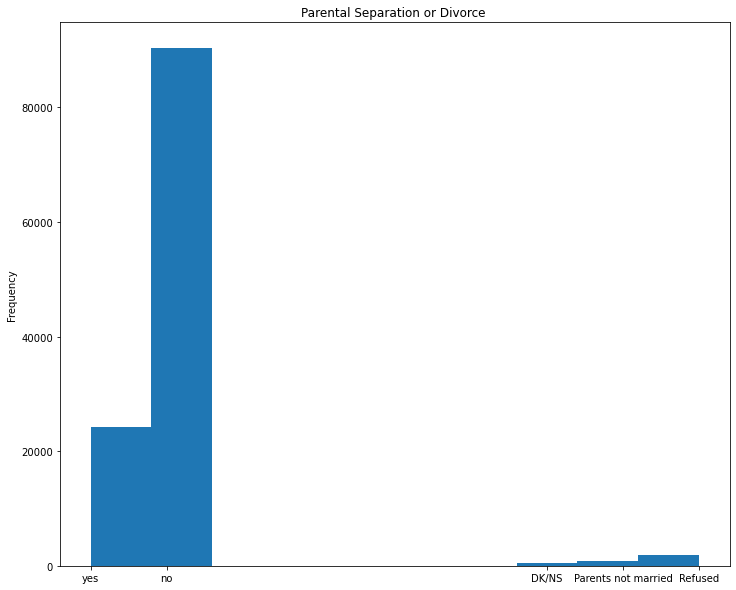

In [206]:
# 1=Yes; 2=No; 8=Parents not married; 7=DK/NS; 9=Refused
plt.figure(figsize=(12, 10))
plt.title('Parental Separation or Divorce ')
plt.hist(x=combined_no_null['ACEDIVRC'], histtype='bar');
plt.ylabel('Frequency')
plt.xticks(ticks = [1, 2, 7, 8, 9], labels = ['yes', 'no', 'DK/NS', 'Parents not married', 'Refused']);

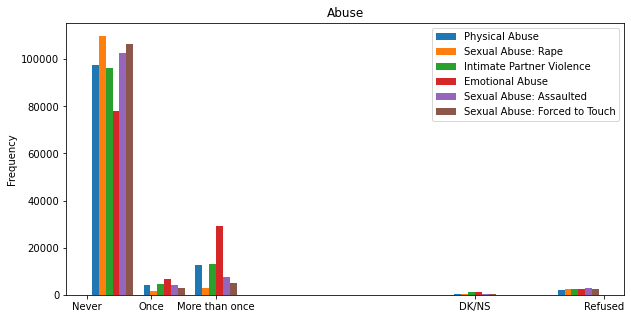

In [192]:
# 1=Never; 2=Once; 3=More than once; 7=DK/NS; 9=Refused 
plt.figure(figsize=(10, 5))
plt.title('Abuse')
plt.hist(x=[combined_no_null['ACEHURT'], combined_no_null['ACEHVSEX'], 
            combined_no_null['ACEPUNCH'], combined_no_null['ACESWEAR'],
            combined_no_null['ACETOUCH'], combined_no_null['ACETTHEM']], histtype='bar');
plt.ylabel('Frequency')
plt.xticks(ticks = [1, 2, 3, 7, 9], labels = ['Never', 'Once', 'More than once', 'DK/NS', 'Refused']);
plt.legend(labels=['Physical Abuse', 'Sexual Abuse: Rape', 'Intimate Partner Violence', 'Emotional Abuse', 'Sexual Abuse: Assaulted', 'Sexual Abuse: Forced to Touch']);

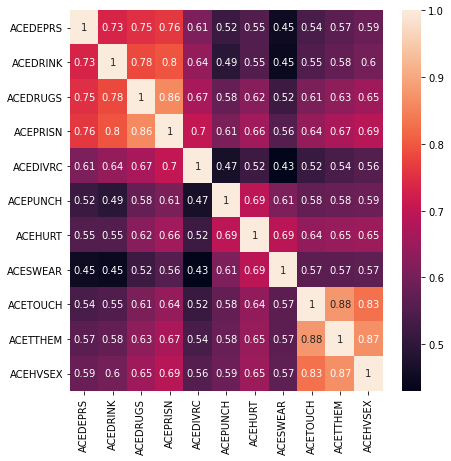

In [153]:
plt.figure(figsize=(7, 7))
sns.heatmap(combined_no_null[['ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC', 'ACEPUNCH', 'ACEHURT', 'ACESWEAR', 
                       'ACETOUCH', 'ACETTHEM', 'ACEHVSEX']].corr(), annot=True);

KeyboardInterrupt: 

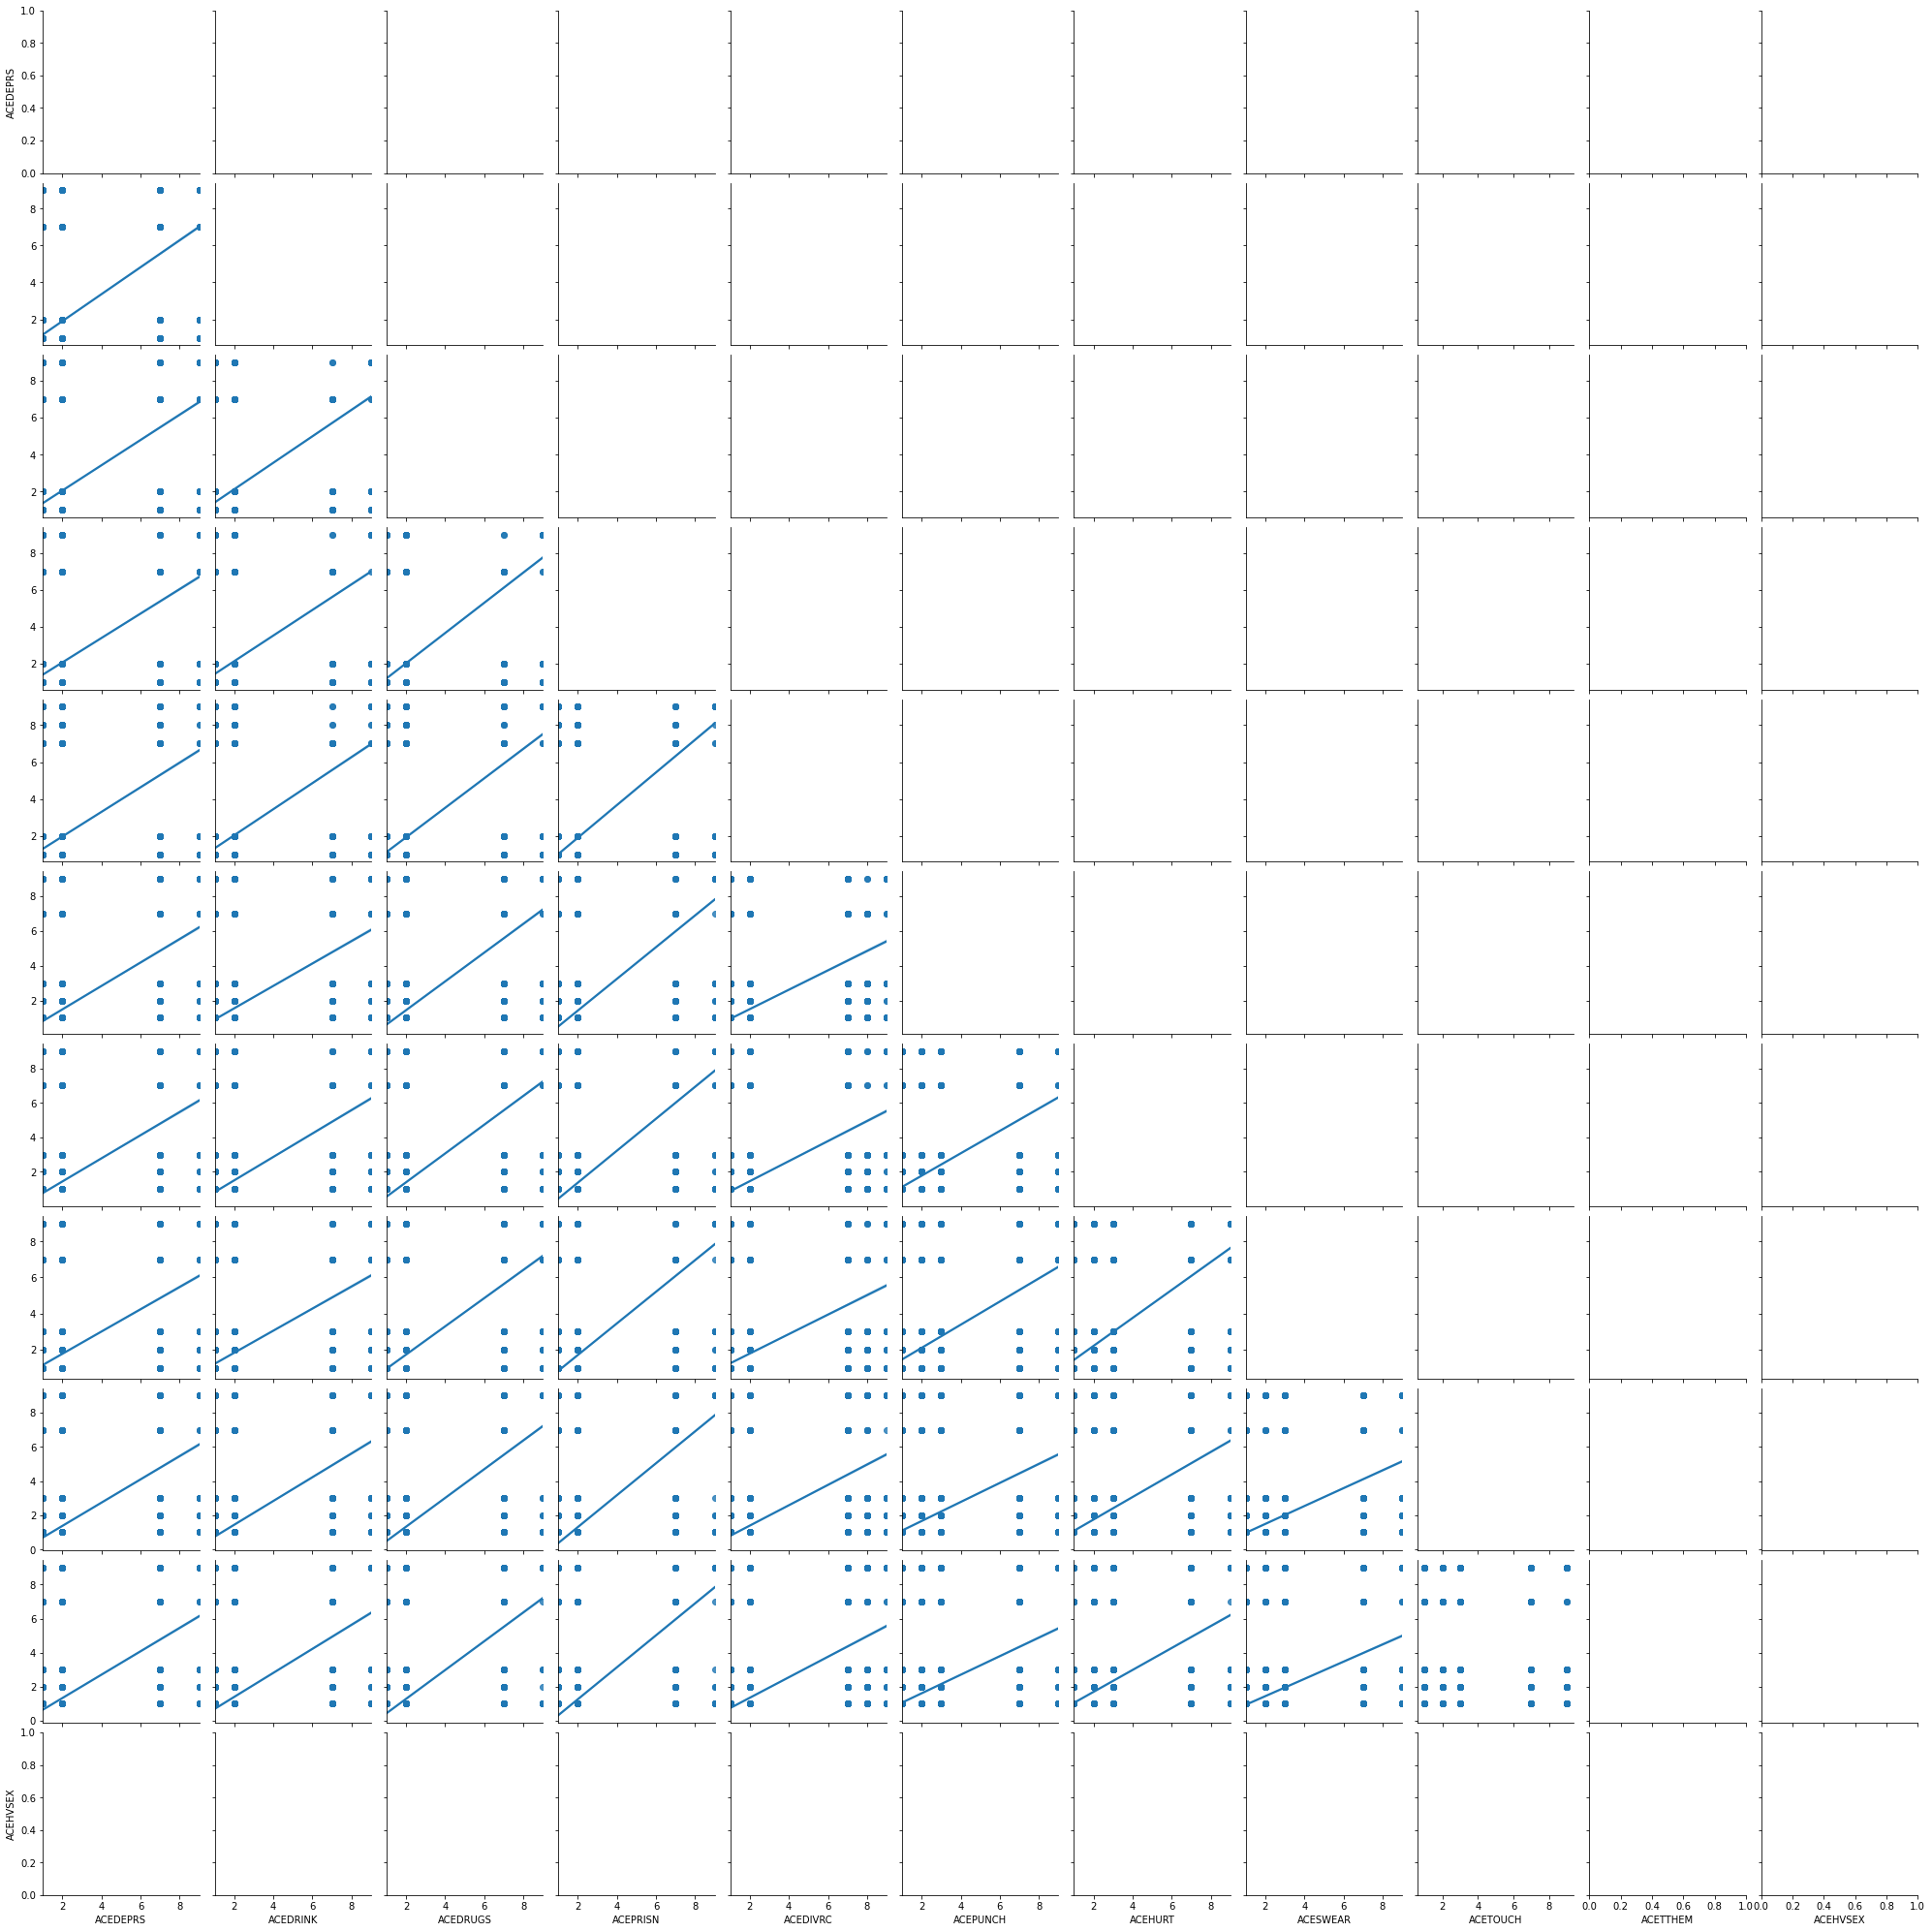

In [154]:
g = sns.PairGrid(combined_no_null[['ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC', 'ACEPUNCH', 'ACEHURT', 'ACESWEAR', 
                       'ACETOUCH', 'ACETTHEM', 'ACEHVSEX']])
g = g.map_lower(sns.regplot)    # Regression plots in lower triangle.
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)  # KDE plots in upper triangle.
g = g.map_diag(plt.hist)        # Histograms along diagonal.

plt.show()